# Offshore Data
This notebook is a preliminary exploration and QC of offshore wind data hosted on airtable.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

In [2]:
path_projects = Path('../data/raw/offshore_wind_projects.csv')
assert path_projects.exists()

In [3]:
path_locations = Path('../data/raw/offshore_wind_locations.csv')
assert path_locations.exists()

In [4]:
proj = pd.read_csv(path_projects, index_col='project_id')
proj

,Name,Recipient State,Developer,Status,Proposed cable landing,County of Cable Landing,Port Locations,Size (megawatts),Online date,Notes,Cable Location IDs,Port Location IDs
project_id,,,,,,,,,,,,
1,Commonwealth Wind,MA,Avangrid,Contracted,Barnstable,Barnstable County,"Somerset,Salem",800,NaN,NaN,3,"45, 42"
2,Kitty Hawk Offshore,TBD,Avangrid,Permitting underway - no contract,"Virginia Beach,Dare County","Dare County, Virginia Beach",NaN,2500,NaN,NaN,"49, 12",NaN
3,Vineyard Wind,MA,"Avangrid,CIP",Under construction,Barnstable,Barnstable County,"New Bedford,Salem",800,2023.0,NaN,3,"28, 42"
4,South Fork Wind Farm,NY,Orsted,Under construction,East Hampton,Suffolk County,"New London,Montauk",132,2023.0,NaN,13,"29, 25"
5,Revolution Wind,"RI,CT",Orsted,Contracted,North Kingstown,Washington County,"North Kingstown,Providence,New London",700,2023.0,NaN,30,"30, 39, 29"
6,Ocean Wind 1 & 2,NJ,Orsted,Contracted,"Seaside Park,Ocean City,Forked River","Ocean County, Cape May","Paulsboro,Lower Alloways Creek,Atlantic City",2248,2024.0,NaN,"44, 31, 17","35, 24, 2"
7,Mayflower Wind,MA,"Shell,EDPR,Engie",Contracted,"Somerset,Falmouth","Bristol County, Barnstable County",New Bedford,1204,2025.0,NaN,"45, 15",28
8,Sunrise Wind,NY,Orsted,Contracted,Brookhaven,Suffolk County,"New London,Port Jefferson,Coeymans",924,2025.0,NaN,6,"29, 37, 9"
9,Park City Wind,CT,Avangrid,Contracted,Barnstable,Barnstable County,"Bridgeport,Salem",804,2025.0,NaN,3,"5, 42"


In [5]:
proj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     16 non-null     object 
 1   Recipient State          16 non-null     object 
 2   Developer                16 non-null     object 
 3   Status                   16 non-null     object 
 4   Proposed cable landing   16 non-null     object 
 5   County of Cable Landing  16 non-null     object 
 6   Port Locations           15 non-null     object 
 7   Size (megawatts)         16 non-null     int64  
 8   Online date              14 non-null     float64
 9   Notes                    0 non-null      float64
 10  Cable Location IDs       16 non-null     object 
 11  Port Location IDs        15 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ KB


In [6]:
locs = pd.read_csv(path_locations, index_col='location_id')
locs.head()

,City,State,County,County FIPS,Why of interest?,Priority,Cable landing(s),Assembly/manufacturing,Notes,Cable project IDs,assembly/manufac project IDs
location_id,,,,,,,,,,,
1,Albany,NY,Albany County,36001.0,Contracted project,NaN,NaN,Beacon Wind,NaN,NaN,16
2,Atlantic City,NJ,Atlantic County,34001.0,Contracted project,NaN,Atlantic Shores,Ocean Wind 1 & 2,NaN,15,6
3,Barnstable,MA,Barnstable County,25001.0,Contracted project,NaN,"Vineyard Wind,Commonwealth Wind,Park City Wind",NaN,NaN,"3, 1, 9",NaN
4,Beaumont,TX,Jefferson County,48245.0,Proposed lease area,NaN,NaN,NaN,NaN,NaN,NaN
5,Bridgeport,CT,Fairfield County,9001.0,Contracted project,NaN,NaN,Park City Wind,NaN,NaN,9


In [7]:
locs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          50 non-null     object 
 1   State                         50 non-null     object 
 2   County                        49 non-null     object 
 3   County FIPS                   49 non-null     float64
 4   Why of interest?              50 non-null     object 
 5   Priority                      0 non-null      float64
 6   Cable landing(s)              18 non-null     object 
 7   Assembly/manufacturing        20 non-null     object 
 8   Notes                         0 non-null      float64
 9   Cable project IDs             18 non-null     object 
 10  assembly/manufac project IDs  20 non-null     object 
dtypes: float64(3), object(8)
memory usage: 4.7+ KB


## Cleaning
### Accuracy
This is another consultant's responsibility.
### Atomicity
Projects has several multi-valued columns:
* Recipient State
* Developer

And several multi-valued columns with corresponding multivalued IDs:
* Proposed cable landing
* County of cable landing
* Port Locations

I believe all of those except `Developer` have foreign key relationships to the locations table.

Locations also has multi-valued columns with corresponding multivalued IDs:
* Assembly/manufacturing
* Cable landing(s)

### Completeness
* Hampton Roads, VA is a MSA consisting of 10-19 counties (depending on definition). I'll ask for more clarification, else split it amongst all of those.

In [8]:
proj.isna().sum()

Name                        0
Recipient State             0
Developer                   0
Status                      0
Proposed cable landing      0
County of Cable Landing     0
Port Locations              1
Size (megawatts)            0
Online date                 2
Notes                      16
Cable Location IDs          0
Port Location IDs           1
dtype: int64

In [9]:
locs.isna().sum()

City                             0
State                            0
County                           1
County FIPS                      1
Why of interest?                 0
Priority                        50
Cable landing(s)                32
Assembly/manufacturing          30
Notes                           50
Cable project IDs               32
assembly/manufac project IDs    30
dtype: int64

In [10]:
pd.concat([locs['Why of interest?'], locs['Cable landing(s)'].isna()], axis=1).value_counts(dropna=False)

Why of interest?         Cable landing(s)
Contracted project       False               17
                         True                16
Proposed lease area      True                13
Lease area in proximity  True                 3
                         False                1
dtype: int64

### Uniformity
* all states are represented as abbreviations
#### Null Representation
* the only non-standard Null value is "TBD" in `Recipient State`

In [11]:
proj.eq('').any()

Name                       False
Recipient State            False
Developer                  False
Status                     False
Proposed cable landing     False
County of Cable Landing    False
Port Locations             False
Size (megawatts)           False
Online date                False
Notes                      False
Cable Location IDs         False
Port Location IDs          False
dtype: bool

In [12]:
locs.eq('').any()

City                            False
State                           False
County                          False
County FIPS                     False
Why of interest?                False
Priority                        False
Cable landing(s)                False
Assembly/manufacturing          False
Notes                           False
Cable project IDs               False
assembly/manufac project IDs    False
dtype: bool

In [13]:
proj['Recipient State'].head(3)

project_id
1     MA
2    TBD
3     MA
Name: Recipient State, dtype: object

### Validity

#### Range

<AxesSubplot: >

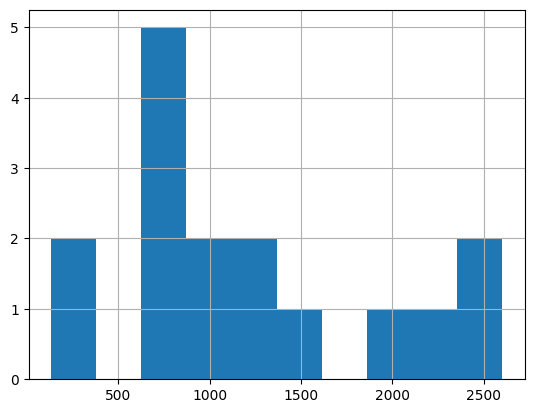

In [14]:
proj['Size (megawatts)'].hist()

In [15]:
# are there really offshore projects < 300 MW? Google says yes 🤷🏼‍♂️
proj['Size (megawatts)'].nsmallest(3)

project_id
4     132
14    248
5     700
Name: Size (megawatts), dtype: int64

In [16]:
proj['Online date'].describe()

count      14.000000
mean     2025.285714
std         1.637473
min      2023.000000
25%      2024.250000
50%      2025.500000
75%      2026.000000
max      2028.000000
Name: Online date, dtype: float64

#### Uniqueness
* (`city`, `state`) currently works as the primary key of locations. I added an autoincrementing integer ID `location_id` in Airtable to ensure this isn't a problem in the future.
* I think if there are multiple `why of interest?` in the future, they will be represented with array values like `cable landings` and `assembly/manufacturing` are currently.
* `Name` is the current primary key for projects, but name collisions are possible in the future. I added an autoincrementing integer ID `project_id` in Airtable to ensure this isn't a problem in the future.

In [17]:
locs['City'].is_unique

False

In [18]:
locs.index.is_unique # location_id

True

In [19]:
locs[['City', 'State']].duplicated().any()

False

In [20]:
locs.loc[locs.duplicated(subset=['City'], keep=False),:]

,City,State,County,County FIPS,Why of interest?,Priority,Cable landing(s),Assembly/manufacturing,Notes,Cable project IDs,assembly/manufac project IDs
location_id,,,,,,,,,,,
31,Ocean City,NJ,Cape May,34009.0,Contracted project,NaN,Ocean Wind 1 & 2,NaN,NaN,6,NaN
32,Ocean City,MD,Worcester,24047.0,Contracted project,NaN,NaN,"Marwin,Momentum Wind",NaN,NaN,"14, 11"


In [21]:
proj['Name'].is_unique

True

In [22]:
proj.index.is_unique # project_id

True

#### Set Membership

In [23]:
def split_and_stack_multivalued_series(ser: pd.Series, name='state') -> pd.Series:
    return ser.str.split(',', expand=True).melt(value_vars=[0,1], value_name=name).dropna().loc[:,name].copy()

In [24]:
!pip list | grep pudl

catalystcoop.pudl             0.6.0
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [25]:
from pudl.metadata.enums import US_STATES
states = set(US_STATES.keys())

/app/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [26]:
# This is for a later version of PUDL
# from pudl.metadata.dfs import POLITICAL_SUBDIVISIONS
# states = set(POLITICAL_SUBDIVISIONS.loc[POLITICAL_SUBDIVISIONS['subdivision_type'].eq('state'), 'subdivision_code'].to_list())

In [27]:
len(states)

50

##### Projects

In [28]:
assert locs['State'].isin(states).all()

In [29]:
# ignore the one null value for now
assert split_and_stack_multivalued_series(proj['Recipient State'].replace({'TBD': np.nan}).dropna()).isin(states).all()

In [30]:
split_and_stack_multivalued_series(proj['Developer']).value_counts(dropna=False).sort_index()

Avangrid    4
BP          2
CIP         1
Dominion    1
EDF         1
EDPR        1
Equinor     2
Orsted      5
Shell       2
US Wind     2
Name: state, dtype: int64

In [31]:
proj['Status'].value_counts(dropna=False)

Contracted                           13
Under construction                    2
Permitting underway - no contract     1
Name: Status, dtype: int64

##### Locations

In [32]:
assert locs['State'].isin(states).all()

In [33]:
locs['Why of interest?'].value_counts(dropna=False)

Contracted project         33
Proposed lease area        13
Lease area in proximity     4
Name: Why of interest?, dtype: int64

#### Type
* make sure FIPS is a string
* cast `Priority` and `Notes`, which are both entirely Null, to their intended type of string

Projects:
* size should be a float just in case
* online date should be a nullable int
* again notes should be string

In [34]:
locs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   City                          50 non-null     object 
 1   State                         50 non-null     object 
 2   County                        49 non-null     object 
 3   County FIPS                   49 non-null     float64
 4   Why of interest?              50 non-null     object 
 5   Priority                      0 non-null      float64
 6   Cable landing(s)              18 non-null     object 
 7   Assembly/manufacturing        20 non-null     object 
 8   Notes                         0 non-null      float64
 9   Cable project IDs             18 non-null     object 
 10  assembly/manufac project IDs  20 non-null     object 
dtypes: float64(3), object(8)
memory usage: 6.7+ KB


In [35]:
proj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     16 non-null     object 
 1   Recipient State          16 non-null     object 
 2   Developer                16 non-null     object 
 3   Status                   16 non-null     object 
 4   Proposed cable landing   16 non-null     object 
 5   County of Cable Landing  16 non-null     object 
 6   Port Locations           15 non-null     object 
 7   Size (megawatts)         16 non-null     int64  
 8   Online date              14 non-null     float64
 9   Notes                    0 non-null      float64
 10  Cable Location IDs       16 non-null     object 
 11  Port Location IDs        15 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.2+ KB


#### Cross-field
- [X] validate FIPS codes to county/state pairs

* need to use a two-pass geocoding system, first by concatenating "city, county" in the locality field, then filling NaN with results using just "city"

Google Geocoder gets confused when cities and counties within the same state share names (Albany, NY and Albany County, NY, and Houston, TX vs Houston County, TX). The geocoder default behavior seems to return the higher level of government. This messes up some of the `geocoded_locality_type` results, and occasionally messes up the FIPS when the identically-named city and county are not colocated. One way to fix this is to use the two-pass geocoding system described above.

In [36]:
from dbcp.transform.helpers import add_county_fips_with_backup_geocoding

In [37]:
geocoded = add_county_fips_with_backup_geocoding(locs[['City', 'State']], state_col='State', locality_col='City')

In [38]:
geocoded = geocoded.join(locs[['City', 'State', 'County', 'County FIPS']].add_prefix('raw_'))

In [39]:
for county_col in ['raw_County', 'geocoded_containing_county']:
    geocoded.loc[: ,county_col] = geocoded.loc[: ,county_col].str.replace('County', '').str.strip()

In [40]:
geocoded.loc[:, 'raw_County FIPS'] = geocoded['raw_County FIPS'].astype(pd.Int32Dtype()).astype(pd.StringDtype()).str.zfill(5)

In [41]:
fips_not_equal = geocoded['raw_County FIPS'].ne(geocoded['county_id_fips']).fillna(True)
county_not_equal = geocoded['raw_County'].ne(geocoded['geocoded_containing_county']).fillna(True)

In [42]:
geocoded[fips_not_equal]

,City,State,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,raw_City,raw_State,raw_County,raw_County FIPS
location_id,,,,,,,,,,,
20,Hampton Roads,VA,51,<NA>,,,,Hampton Roads,VA,NaN,<NA>
21,Houston,TX,48,48225,Houston,county,Houston,Houston,TX,Harris,48201


In [43]:
geocoded[county_not_equal]

,City,State,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,raw_City,raw_State,raw_County,raw_County FIPS
location_id,,,,,,,,,,,
8,Brooklyn,NY,36,36047,Brooklyn,county,Brooklyn,Brooklyn,NY,Kings,36047
20,Hampton Roads,VA,51,<NA>,,,,Hampton Roads,VA,NaN,<NA>
21,Houston,TX,48,48225,Houston,county,Houston,Houston,TX,Harris,48201
38,Portsmouth,VA,51,51740,Portsmouth,county,Portsmouth,Portsmouth,VA,Portsmouth City,51740
47,Staten Island,NY,36,36085,Staten Island,county,Staten Island,Staten Island,NY,Richmond,36085
49,Virginia Beach,VA,51,51810,Virginia Beach,county,Virginia Beach,Virginia Beach,VA,Virginia Beach City,51810


In [44]:
houston_test = add_county_fips_with_backup_geocoding(pd.DataFrame({'state': ['TX', 'TX'], 'county': ['city of Houston', 'houston']}))

In [45]:
houston_test

,state,county,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county
0,TX,city of Houston,48,48201,Houston,city,Harris County
1,TX,houston,48,48225,houston,county,houston


Idea: try concatenating county name in with the city/state pair and geocoding that.

In [46]:
locs['concat'] = locs['City'] + ', ' + locs['County']

In [47]:
geo2 = add_county_fips_with_backup_geocoding(locs[['concat', 'State']], state_col='State', locality_col='concat')

In [48]:
geo2 = geo2.join(locs[['City', 'State', 'County', 'County FIPS']].add_prefix('raw_'))

In [49]:
geo2.columns

Index(['concat', 'State', 'state_id_fips', 'county_id_fips', 'geocoded_locality_name', 'geocoded_locality_type', 'geocoded_containing_county', 'raw_City', 'raw_State', 'raw_County', 'raw_County FIPS'], dtype='object')

In [50]:
for county_col in ['raw_County', 'geocoded_containing_county']:
    geo2.loc[: ,county_col] = geo2.loc[: ,county_col].str.replace('County', '').str.strip()

In [51]:
geo2.loc[:, 'raw_County FIPS'] = geo2['raw_County FIPS'].astype(pd.Int32Dtype()).astype(pd.StringDtype()).str.zfill(5)

In [52]:
fips_not_equal2 = geo2['raw_County FIPS'].ne(geo2['county_id_fips']).fillna(True)
county_not_equal2 = geo2['raw_County'].ne(geo2['geocoded_containing_county']).fillna(True)

In [53]:
geo2[fips_not_equal2]

,concat,State,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,raw_City,raw_State,raw_County,raw_County FIPS
location_id,,,,,,,,,,,
20,NaN,VA,51,<NA>,VA,,,Hampton Roads,VA,NaN,<NA>
38,"Portsmouth, Portsmouth City",VA,51,<NA>,Portsmouth Trail,,,Portsmouth,VA,Portsmouth City,51740
49,"Virginia Beach, Virginia Beach City",VA,51,<NA>,Virginia Beach,city,"Virginia Beach, Virginia Beach City",Virginia Beach,VA,Virginia Beach City,51810


In [54]:
geo2[county_not_equal2]

,concat,State,state_id_fips,county_id_fips,geocoded_locality_name,geocoded_locality_type,geocoded_containing_county,raw_City,raw_State,raw_County,raw_County FIPS
location_id,,,,,,,,,,,
20,NaN,VA,51,<NA>,VA,,,Hampton Roads,VA,NaN,<NA>
38,"Portsmouth, Portsmouth City",VA,51,<NA>,Portsmouth Trail,,,Portsmouth,VA,Portsmouth City,51740
49,"Virginia Beach, Virginia Beach City",VA,51,<NA>,Virginia Beach,city,"Virginia Beach, Virginia Beach City",Virginia Beach,VA,Virginia Beach City,51810


### Consistency
Locations:
- [ ] Check FIPS codes vs master table
- [X] Geocode names to ensure consistency
- [X] ensure foreign key relationships hold between projects and locations
    - [x] projects cable landings are in locations
    - [X] projects port locations are in locations
    - [x] locations cable landing are in projects
    - [X] locations assembly/manufacturing are in projects

In [55]:
def make_association_table(ser: pd.Series, name='id') -> pd.Series:
    expanded = ser.str.split(',', expand=True)
    return expanded.melt(value_vars=expanded.columns, value_name=name, ignore_index=False).dropna().loc[:,name].str.strip().astype(int)

In [62]:
locations_to_landings = pd.MultiIndex.from_frame(
    make_association_table(locs['Cable project IDs'], name='project_id')
    .reset_index()
    .sort_values(['location_id', 'project_id'])
    [['location_id', 'project_id']]
)

In [63]:
landing_to_locations = pd.MultiIndex.from_frame(
    make_association_table(proj['Cable Location IDs'], name='location_id')
    .reset_index()
    .sort_values(['location_id', 'project_id'])
    [['location_id', 'project_id']]
)

In [64]:
assert locations_to_landings.symmetric_difference(landing_to_locations).empty

In [65]:
locations_to_ports = pd.MultiIndex.from_frame(
    make_association_table(locs['assembly/manufac project IDs'], name='project_id')
    .reset_index()
    .sort_values(['location_id', 'project_id'])
    [['location_id', 'project_id']]
)

In [66]:
ports_to_locations = pd.MultiIndex.from_frame(
    make_association_table(proj['Port Location IDs'], name='location_id')
    .reset_index()
    .sort_values(['location_id', 'project_id'])
    [['location_id', 'project_id']]
)

In [67]:
assert locations_to_ports.symmetric_difference(ports_to_locations).empty

### Consistency - Compare to ISO Queues

In [2]:
import dbcp

/app/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
db_engine = dbcp.helpers.get_sql_engine()

In [36]:
iso_offshore = pd.read_sql(
    """
select
    project_id,
    loc.county_id_fips,
    loc.raw_state_name,
    loc.geocoded_containing_county,
    proj.project_name,
    res.capacity_mw,
    proj.utility,
    proj.date_proposed,
    proj.queue_date,
    proj.queue_status,
    proj.point_of_interconnection,
    proj.region,
    proj.developer
from data_warehouse.iso_projects_2021 as proj
left join data_warehouse.iso_resource_capacity_2021 as res
USING(project_id)
left join data_warehouse.iso_locations_2021 as loc
USING(project_id)
WHERE res.resource_clean = 'Offshore Wind'
order by project_id
""",
    db_engine
)

In [37]:
iso_offshore['project_id'].is_unique  # True == no multi-county projects

True

In [38]:
offshore_locs = pd.read_sql(
    """
SELECT
    assoc."location_id",
    "county_id_fips",
    "raw_state_abbrev",
    "geocoded_containing_county",
    "geocoded_locality_name",
    "why_of_interest",
    assoc.project_id,
    capacity_mw,
    developer,
    name as project_name,
    status,
    proposed_completion_year
FROM "data_warehouse"."offshore_wind_locations" as loc
FULL OUTER JOIN "data_warehouse"."offshore_wind_cable_landing_association" as assoc
USING(location_id)
FULL OUTER JOIN "data_warehouse"."offshore_wind_projects" as proj
USING(project_id)
order by location_id
""",
    db_engine
)

In [39]:
iso_counties = (iso_offshore.groupby(['county_id_fips', 'raw_state_name', 'geocoded_containing_county'], dropna=False)
                [['project_id', 'capacity_mw']]
                .agg({'project_id': 'count', 'capacity_mw': 'sum'})
               ).reset_index(level=['raw_state_name', 'geocoded_containing_county'], drop=False)

In [40]:
our_counties = (offshore_locs.groupby(['county_id_fips', 'raw_state_abbrev', 'geocoded_containing_county'], dropna=False)
                [['project_id', 'capacity_mw']]
                .agg({'project_id': 'count', 'capacity_mw': 'sum'})
               ).reset_index(level=['raw_state_abbrev', 'geocoded_containing_county'], drop=False)

#### Location based comparison

In [41]:
# iso_only
iso_only_location_based = iso_counties.index.difference(our_counties.index)
iso_only_location_based

Index(['34023', '36005', '36061', '51550'], dtype='object', name='county_id_fips')

In [42]:
# our_only
our_counties.index.difference(iso_counties.index)

Index(['06023', '09001', '09011', '22019', '24005', '24011', '24047', '25001', '25005', '25009', '34015', '34033', '36001', '37055', '37129', '41011', '41015', '44007', '44009', '45051', '48039', '48167', '48201', '48245', '48361', '51740'], dtype='object', name='county_id_fips')

#### Project-based comparison

In [43]:
# iso_only
iso_counties.loc[iso_counties['project_id'].ge(1),:].index.difference(our_counties.loc[our_counties['project_id'].ge(1),:].index)

Index([nan, '06079', '34023', '36005', '36061', '36085', '51550'], dtype='object', name='county_id_fips')

In [44]:
# our_only
our_counties.loc[our_counties['project_id'].ge(1),:].index.difference(iso_counties.loc[iso_counties['project_id'].ge(1),:].index)

Index(['25001', '25005', '37055', '44009'], dtype='object', name='county_id_fips')

In [45]:
iso_counties.shape, our_counties.shape

((19, 4), (39, 4))

ISO projects from counties NOT in our dataset

In [47]:
proj_iso_only = iso_offshore.loc[iso_offshore['county_id_fips'].isin(iso_only_location_based),:]
proj_iso_only

,project_id,county_id_fips,raw_state_name,geocoded_containing_county,project_name,capacity_mw,utility,date_proposed,queue_date,queue_status,point_of_interconnection,region,developer
46,2493,51550,VA,city of chesapeake,None,880.0,Dominion,2025-12-31,2019-09-17,active,Oceana 230 kV,PJM,None
52,3369,34023,NJ,middlesex,None,1300.0,PSEG,2027-11-01,2020-12-04,active,Deans 500 kV,PJM,None
58,4615,36061,NY,manhattan,OW Ocean Winds East 6,1600.0,ConEd,2029-09-01,2021-06-02,active,West 49th St 345 kV,NYISO,"OW Ocean Winds East, LLC"
70,4640,36005,NY,bronx,NY Wind - Mott Haven,1272.0,ConEd,2026-01-01,2020-08-04,active,Mott Haven 345kV,NYISO,Bay State Wind


In [49]:
from io import StringIO

In [50]:
buffer = StringIO()

In [51]:
proj_iso_only.to_csv(buffer, index=False)

In [55]:
print(buffer.getvalue())

project_id,county_id_fips,raw_state_name,geocoded_containing_county,project_name,capacity_mw,utility,date_proposed,queue_date,queue_status,point_of_interconnection,region,developer
2493,51550,VA,city of chesapeake,,880.0,Dominion,2025-12-31,2019-09-17,active,Oceana 230 kV,PJM,
3369,34023,NJ,middlesex,,1300.0,PSEG,2027-11-01,2020-12-04,active,Deans 500 kV,PJM,
4615,36061,NY,manhattan,OW Ocean Winds East 6,1600.0,ConEd,2029-09-01,2021-06-02,active,West 49th St 345 kV,NYISO,"OW Ocean Winds East, LLC"
4640,36005,NY,bronx,NY Wind - Mott Haven,1272.0,ConEd,2026-01-01,2020-08-04,active,Mott Haven 345kV,NYISO,Bay State Wind

